In [2]:
print([i for i in range(10)])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [4]:
# 省略可能（ジェネレータの内包表記になる）
print(i for i in range(10))

<generator object <genexpr> at 0x7fb32ff9d390>


In [6]:
print({i for i in range(10)})

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [8]:
print({i:i**2 for i in range(10)})

{0: 0, 1: 1, 2: 4, 3: 9, 4: 16, 5: 25, 6: 36, 7: 49, 8: 64, 9: 81}


In [10]:
# 省略できるのはリストの内包表記のみ
print(i:i**2 for i in range(10))

SyntaxError: invalid syntax (<ipython-input-10-ff56a45aebd1>, line 2)

In [3]:
def print_n(content, n):
    print(content)

# 引数が2つ以上だと省略できない
print_n(i for i in range(10), 2)

SyntaxError: Generator expression must be parenthesized (<ipython-input-3-ce16579cea87>, line 5)

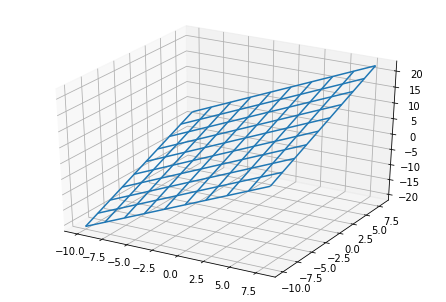

In [37]:
# 3次元に平面をプロットする

import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# 3点の座標
a = np.array([1, 0, 4.4])
b = np.array([0, 1, 4])
c = np.array([0, 0, 3])

# アフィン結合にする
u = b - a
v = c - a

# s.u + t.v + a
#
# x = -s - t + 1
# y = s
# z = -0.4s - 1.4t + 4.4
#
# これを解いて
# z = 1.4x + y + 3

step = 2
xs, ys = np.meshgrid(np.arange(-10, 10, step), np.arange(-10, 10, step))
zs = 1.4 * xs + ys + 3

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_wireframe(xs, ys, zs)

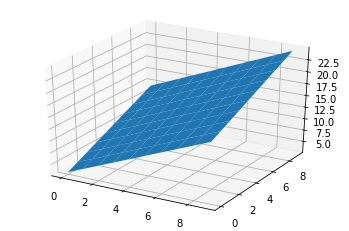

In [20]:
# 外積を使う方法
# https://codeday.me/jp/qa/20190522/879818.html

points = [[1, 0, 4.4],
          [0, 1, 4],
          [0, 0, 3]]

p0, p1, p2 = points
x0, y0, z0 = p0
x1, y1, z1 = p1
x2, y2, z2 = p2

ux, uy, uz = u = [x1-x0, y1-y0, z1-z0]
vx, vy, vz = v = [x2-x0, y2-y0, z2-z0]

u_cross_v = [uy*vz-uz*vy, uz*vx-ux*vz, ux*vy-uy*vx]

point  = np.array(p0)
normal = np.array(u_cross_v)

d = -point.dot(normal)

xx, yy = np.meshgrid(range(10), range(10))

z = (-normal[0] * xx - normal[1] * yy - d) * 1. / normal[2]

# plot the surface
plt3d = plt.figure().gca(projection='3d')
plt3d.plot_surface(xx, yy, z)
plt.show()

In [52]:
# meshgrid はパラメータの全組み合わせを多次元配列として生成する

x, y = np.meshgrid(range(3), range(3))
x

array([[0, 1, 2],
       [0, 1, 2],
       [0, 1, 2]])

In [53]:
y

array([[0, 0, 0],
       [1, 1, 1],
       [2, 2, 2]])

In [55]:
x + 2*y

array([[0, 1, 2],
       [2, 3, 4],
       [4, 5, 6]])